In [181]:
from pgmpy.models import MarkovModel, BayesianModel
from pgmpy.factors import Factor
from pgmpy.readwrite import XMLBIFWriter
from pgmpy.inference import BeliefPropagation
import scipy.stats as stats
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from pgmpy.inference import VariableElimination
import time
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [53]:
esp_eligible_products = ['Money Market Bonus','Collateral MMA',
'Cash Management',
'FX Products',
'Letters of Credit',
'Enterprise Sweep',
'Checking USD']

In [6]:
from pgmpy.factors import JointProbabilityDistribution as Joint

In [4]:
 checking_prob = np.poly1d([ -1.25712688e-07,  -2.44667686e-04,   9.74145030e-01])

In [315]:
## define a probability distribution over each pair of varaibles
def ESP_Joint_Product_Probabilities(week_n):
    """Returns the conditions probabilities of money market and every other ESP product.
    Joint probability are from 2013-2016 GP with L10 desc data.
    
    Returns a dictionary of each probabilitiy distribution given the time.
    
    Takes inputs as weeks. need to convert to days interally in the function"""
    days = week_n*7

    
    # find the probabilities given a month number for money market bonus
 
    
    mmb1_cmma1 = np.poly1d([  2.59374752e-07 , -1.88617729e-04 ,  6.49014381e-02] )
    mmb1_cmma0 = np.poly1d([  4.36832764e-07 , -3.30834560e-04 ,  7.95124572e-02] )
    mmb0_cmma1 = np.poly1d([  1.03673371e-07 , -1.37413093e-05,  2.77725214e-02] )
    mmb0_cmma0 = np.poly1d([ -1.94789521e-07  , 1.13321139e-04 ,  9.43189096e-01])
    
    mmb1_cm1 = np.poly1d([  2.20352213e-07 , -1.52643307e-04 ,  6.10662383e-02] )
    mmb1_cm0 = np.poly1d([  1.84912063e-07 , -1.00981579e-04 , 4.46710972e-02] )
    mmb0_cm1 = np.poly1d([  2.54934870e-10 , -2.79728513e-07 ,  1.32236567e-04  , 1.30696089e-02]   )
    mmb0_cm0 = np.poly1d([ -1.78602348e-07  , 9.51150757e-05 ,  9.46812951e-01] )
    
    mmb1_fx1 = np.poly1d( [  5.49202992e-07 , -4.83279167e-04 ,  9.95590698e-02] )
    mmb1_fx0 = np.poly1d([  3.22254611e-07 , -2.75506744e-04 ,  7.53905216e-02]  )
    mmb0_fx1 = np.poly1d([  3.57294489e-10  ,-4.31694274e-07  , 1.79160523e-04 ,  8.56445334e-03] )
    mmb0_fx0 = np.poly1d([ -5.34692495e-10  , 7.95799633e-07 , -3.52310179e-04 ,  9.98502560e-01] )
    
    mmb1_loc1 = np.poly1d([  5.65033177e-08,  -1.77644422e-05 ,  3.14006766e-02] )
    mmb1_loc0 = np.poly1d([  9.16836405e-05 , -1.65501900e-03]  )
    mmb0_loc1 = np.poly1d([ 0.00011076 , 0.00045667])
    mmb0_loc0 = np.poly1d([ -8.97301599e-05  , 1.00249908e+00]  )
    
    mmb1_es1 = np.poly1d([  5.86338285e-05  , 1.88694806e-02]  )
    mmb1_es0 = np.poly1d([  8.35662179e-08 , -1.68162329e-05  , 2.79617966e-02] )
    mmb0_es1 = np.poly1d([  1.03262572e-07  ,-1.82141167e-05 ,  2.12247806e-02]  )
    mmb0_es0 = np.poly1d( [ -8.53798885e-08  , 1.09588935e-05  , 9.75401432e-01]  )

    mmb1_checking1 = np.poly1d([  6.13326184e-10 , -1.04286030e-06 ,  5.36195902e-04 , -4.83715921e-03] )
    mmb1_checking0 = np.poly1d([ -1.73103494e-06 ,  1.42061215e-04  , 9.68170417e-03]  )
    mmb0_checking1 = np.poly1d([  2.78679134e-10 , -3.43457538e-07  , 1.13597552e-04  , 4.32753039e-02] )
    mmb0_checking0 = np.poly1d([ -4.48956542e-10 ,  7.40327823e-07 , -3.65254836e-04 ,  9.43425248e-01] )
    
    ## Collatral CMMA
    cmma1_cm1 = np.poly1d([  5.84960719e-10 , -1.11400306e-06  , 6.58406265e-04,   4.57461405e-02]   ) # done
    cmma1_cm0 = np.poly1d([  2.64473404e-07 , -2.28430001e-04 ,  7.74826956e-02]  )# done 
    cmma0_cm1 = np.poly1d([  7.57962370e-05  , 8.86311694e-03])
    cmma0_cm0 = np.poly1d([ -1.10763027e-07  , 4.72945734e-05 ,  8.39313725e-01]) # done
    
    cmma1_fx1 = np.poly1d([  2.17779387e-07 , -1.35808804e-04 ,  5.01118883e-02] )
    cmma1_fx0 = np.poly1d([  6.52608491e-10 , -1.04900689e-06  , 5.03371068e-04  , 2.71456976e-03])
    cmma0_fx1 = np.poly1d([  5.75340580e-10 , -8.65398185e-07 ,  3.71849829e-04 , -3.68071678e-03])
    cmma0_fx0 = np.poly1d([ -3.76314667e-10  , 5.58051598e-07 , -2.93635571e-04  , 9.65537391e-01] )

    
    cmma1_loc1 = np.poly1d([  3.88739852e-07 , -3.29540131e-04  , 8.41376396e-02]  )
    cmma1_loc0 = np.poly1d([ -8.96713476e-11  , 2.44066798e-07  ,-7.40310748e-05 ,  3.28490444e-02]  )
    cmma0_loc1 = np.poly1d([ 0.00010498 ,-0.02384952] )
    cmma0_loc0 = np.poly1d([ -3.24114392e-10  , 4.11427494e-07 , -1.88731727e-04 ,  9.89563457e-01]  )
    
    cmma1_es1 = np.poly1d([  7.57204934e-05  , 1.26998169e-02])
    cmma1_es0 = np.poly1d([  5.27199881e-11 , -4.27181617e-08,   3.11816185e-05 ,  2.46004507e-02]  )
    cmma0_es1 = np.poly1d([  1.19336386e-07 , -5.26884786e-05 ,  3.72089345e-02]  )
    cmma0_es0 = np.poly1d([ -8.57938236e-08 ,  3.10723375e-05 ,  9.63965434e-01] )
    
    cmma1_checking1 = np.poly1d( )
    cmma1_checking0 = np.poly1d([  4.46814215e-05  , 2.54237288e-02] )
    cmma0_checking1 = np.poly1d([  9.61879214e-08 , -2.18643614e-04 ,  2.17258787e-01] )
    cmma0_checking0 = np.poly1d([ -1.02339954e-09  , 2.42929967e-06  ,-1.21076118e-03 ,  6.50732150e-01]  )
    # Cash Management  HERE
    cm1_fx1 = np.poly1d([  1.66297232e-07 , -9.18375988e-05 ,  4.47113878e-02] )
    cm1_fx0 = np.poly1d([  7.04417583e-10 , -1.16994389e-06  , 5.97497135e-04 , -2.35572131e-02] )
    cm0_fx1 = np.poly1d([  2.62257291e-07 , -1.86898787e-04 ,  5.15764268e-02] )
    cm0_fx0 = np.poly1d([ -3.86891770e-10  , 5.89682222e-07 , -3.23976897e-04  , 9.80075018e-01] )
    
    cm1_loc1 = np.poly1d([  5.99760394e-07 , -6.56410777e-04 ,  1.95825218e-01] )
    cm1_loc0 = np.poly1d([  1.00794081e-07 , -8.54835908e-06 ,  2.51542406e-02] )
    cm0_loc1 = np.poly1d([  3.39849223e-10 , -2.67673690e-07  , 8.96700609e-05 ,  2.05581470e-02]  )
    cm0_loc0 = np.poly1d([ -2.45562667e-07  , 1.59251270e-04  , 9.46049755e-01] )
    
    cm1_es1 = np.poly1d([  4.99710933e-08  , 1.35344672e-05 ,  2.49617806e-02]  )
    cm1_es0 = np.poly1d([  2.52684255e-11 , -4.29098518e-09  , 1.77941591e-05  , 2.50806472e-02] C )
    cm0_es1 = np.poly1d([  1.00508900e-07 , -2.40930742e-05 ,  2.80607376e-02] )
    cm0_es0 = np.poly1d([ -7.24460462e-08  , 2.34697260e-05  , 9.64479291e-01]  )
    
    cm1_checking1 = np.poly1d([  6.19108031e-10 , -1.21958519e-06 ,  7.45524494e-04 ,  4.83498816e-02])
    cm1_checking0 = np.poly1d([  2.25705351e-07 , -1.10053117e-04 ,  1.83917874e-02] )
    cm0_checking1 = np.poly1d([  3.14132631e-07 , -3.85343000e-04 ,  1.89761722e-01]  )
    cm0_checking0 = np.poly1d([ -3.28291810e-10   5.66144779e-07  -2.50166953e-04   7.63482231e-01]  )
    # FX Product 
    fx1_loc1  = np.poly1d([  1.82582305e-07 , -1.17510396e-04,   5.00917912e-02] )
    fx1_loc0 = np.poly1d([  5.06055845e-08  , 2.47827261e-05 ,  1.94110111e-02]  )
    fx0_loc1 = np.poly1d(  5.30466663e-07 , -4.88201674e-04 ,  1.21691862e-01]   )
    fx0_loc0 = np.poly1d([ -2.23114669e-07 ,  1.49771632e-04 ,  9.44372955e-01] )
    
    fx1_es1 = np.poly1d([  3.84132914e-08 ,  8.97940662e-06,   2.17575160e-02])
    fx1_es0 = np.poly1d([  1.08919918e-07 , -3.31943006e-05 ,  2.15296076e-02])
    fx0_es1 = np.poly1d([  4.89971436e-08 ,  2.39730064e-06 ,  2.38151282e-02])
    fx0_es0 = np.poly1d([ -8.84292413e-08  , 2.24906892e-05 ,  9.72807116e-01]  )
    
    fx1_checking1 = np.poly1d([  2.59224968e-07  ,-2.04650667e-04 ,  8.68351001e-02] )
    fx1_checking0 = np.poly1d([  4.56937489e-05 ,  1.58554462e-02]  )
    fx0_checking1 = np.poly1d([  6.23644941e-10 , -1.17873013e-06 ,  5.90712921e-04  , 1.57935529e-01])
    fx0_checking0 = np.poly1d([ -4.91239940e-10 ,  9.86132876e-07, -5.42863163e-04  , 7.86362496e-01])
    # Letters of Credit
    loc1_es1 = np.poly1d([ 0.00010352 , 0.00874544]  )
    loc1_es0 = np.poly1d([  3.25923995e-05  , 2.17391304e-02] )
    loc0_es1 = np.poly1d([ 0.00012056, -0.02219957]  )
    loc0_es0 = np.poly1d( [] 9.73383069e-09 , -2.06186310e-04 ,  1.09033379e+00] )
    
    loc1_checking1 = np.poly1d([  3.85095233e-07 , -3.24729915e-04  , 8.35521963e-02]  )
    loc1_checking0 = np.poly1d([  1.19975953e-08 , -4.36318499e-06 ,  8.83611847e-03] )
    loc0_checking1 = np.poly1d([ 0.0001306,1 -0.00275775])
    loc0_checking0 = np.poly1d([ -2.14096816e-07 ,  1.42076629e-04  , 9.44624111e-01]  )
    # Enterprise sweep
    es1_checking1 = np.poly1d([  4.78994656e-08 , -5.27252117e-07 ,  2.30208754e-02] )
    es1_checking0 = np.poly1d([  3.19233872e-05 ,  1.20491319e-02]  )
    es0_checking1 = np.poly1d([  3.10522701e-07 , -2.33063727e-04  , 5.47334875e-02]  )
    es0_checking0 = np.poly1d([ -2.81197737e-10  , 4.03168914e-07  ,-1.85067475e-04 ,  9.85420821e-01] )
    
    
    
    # return the probabilities in the form of a dictionary
    # ensure that nothing has a 0% probabiliy (will block the markob model)
    money_market_joint_probabilities = {}

    money_market_joint_probabilities['mmb1_cmma1'] = mmb1_cmma1(days)
    money_market_joint_probabilities['mmb1_cmma0'] = mmb1_cmma0(days)
    money_market_joint_probabilities['mmb0_cmma1'] = mmb0_cmma1(days)
    money_market_joint_probabilities['mmb0_cmma0'] = mmb0_cmma0(days)
    money_market_joint_probabilities['mmb1_checking1'] = mmb1_checking1(days)
    money_market_joint_probabilities['mmb1_checking0'] = mmb1_checking0(days)
    money_market_joint_probabilities['mmb0_checking1'] = mmb0_checking1(days)
    money_market_joint_probabilities['mmb0_checking0'] = mmb0_checking0(days)
    money_market_joint_probabilities['mmb1_cm1'] = mmb1_cm1(days)
    money_market_joint_probabilities['mmb1_cm0'] = mmb1_cm0(days)
    money_market_joint_probabilities['mmb0_cm1'] =mmb0_cm1(days)
    money_market_joint_probabilities['mmb0_cm0'] = mmb0_cm0(days)
    money_market_joint_probabilities['mmb1_fx1'] =mmb1_fx1(days)
    money_market_joint_probabilities['mmb1_fx0'] = mmb1_fx0(days)

    #         money_market_joint_probabilities['mmb0_fx1'] =mmb0_fx1(days)
    money_market_joint_probabilities['mmb0_fx0'] = mmb0_fx0(days)
    money_market_joint_probabilities['mmb0_fx1'] = mmb0_fx1(days)
    money_market_joint_probabilities['mmb1_loc1'] = mmb1_loc1(days)
    money_market_joint_probabilities['mmb1_loc0'] = mmb1_loc0(days)
    money_market_joint_probabilities['mmb0_loc1'] = mmb0_loc1(days)
    money_market_joint_probabilities['mmb0_loc0'] = mmb0_loc0(days)
    money_market_joint_probabilities['mmb1_es1'] = mmb1_es1(days)
    money_market_joint_probabilities['mmb1_es0'] =mmb1_es0(days)
    money_market_joint_probabilities['mmb0_es1'] = mmb0_es1(days)
    money_market_joint_probabilities['mmb0_es0'] =mmb0_es0(days)
    money_market_joint_probabilities['mmb1_checking1'] =  mmb1_checking1(days)
    money_market_joint_probabilities['mmb1_checking0'] = mmb1_checking0(days)
    money_market_joint_probabilities['mmb0_checking1'] = mmb0_checking1(days)
    money_market_joint_probabilities['mmb0_checking0'] = mmb0_checking0(days)
    money_market_joint_probabilities['cmma1_cm1'] =  cmma1_cm1(days)

    money_market_joint_probabilities['cmma1_cm0'] =cmma1_cm0(days)
    money_market_joint_probabilities['cmma0_cm1'] = cmma0_cm1(days)
    money_market_joint_probabilities['cmma0_cm0'] =  cmma0_cm0(days)

    #         money_market_joint_probabilities['cmma1_fx1'] =  cmma1_fx1(days)
    money_market_joint_probabilities['cmma1_fx1'] = cmma1_fx1(days)
    money_market_joint_probabilities['cmma1_fx0'] = cmma1_fx0(days)
    money_market_joint_probabilities['cmma0_fx1'] =cmma0_fx1(days)
    money_market_joint_probabilities['cmma0_fx0'] =  cmma0_fx0(days)

    money_market_joint_probabilities['cmma1_loc1'] =  cmma1_loc1(days)
    money_market_joint_probabilities['cmma1_loc0'] =cmma1_loc0(days)
    money_market_joint_probabilities['cmma0_loc1'] = cmma0_loc1(days)
    money_market_joint_probabilities['cmma0_loc0'] =  cmma0_loc0(days)
    
    money_market_joint_probabilities['cmma1_es1'] =  cmma1_es1(days)
    money_market_joint_probabilities['cmma1_es0'] = cmma1_es0(days)
    money_market_joint_probabilities['cmma0_es1'] = cmma0_es1(days)
    money_market_joint_probabilities['cmma0_es0'] =  cmma0_es0(days)
    
    money_market_joint_probabilities['cmma1_checking1'] =  cmma1_checking1(days)
    money_market_joint_probabilities['cmma1_checking0'] =cmma1_checking0(days)
    money_market_joint_probabilities['cmma0_checking1'] =  cmma0_checking1(days)
    money_market_joint_probabilities['cmma0_checking0'] =  cmma0_checking0(days)
    
    money_market_joint_probabilities['cm1_fx1'] =  cm1_fx1(days)
    money_market_joint_probabilities['cm1_fx0'] =  cm1_fx0(days)
    #     if round( cm0_fx1(days),3)== 0:
    money_market_joint_probabilities['cm0_fx1'] = cm0_fx1(days)
    money_market_joint_probabilities['cm0_fx0'] = cm0_fx0(days)
    money_market_joint_probabilities['cm1_loc1'] = cm1_loc1(days)
    money_market_joint_probabilities['cm1_loc0'] =  cm1_loc0(days)
    money_market_joint_probabilities['cm0_loc1'] =cm0_loc1(days)
    money_market_joint_probabilities['cm0_loc0'] =cm0_loc0(days)
    money_market_joint_probabilities['cm1_es1'] =cm1_es1(days)
    money_market_joint_probabilities['cm1_es0'] =  cm1_es0(days)
    money_market_joint_probabilities['cm0_es1'] = cm0_es1(days)
    money_market_joint_probabilities['cm0_es0'] = cm0_es0(days)
    
    money_market_joint_probabilities['cm1_checking1'] = cm1_checking1(days)
    money_market_joint_probabilities['cm1_checking0'] =  cm1_checking0(days)
    money_market_joint_probabilities['cm0_checking1'] =  cm0_checking1(days)
    money_market_joint_probabilities['cm0_checking0'] =cm0_checking0(days)
    money_market_joint_probabilities['fx1_loc1'] =fx1_loc1(days)
    money_market_joint_probabilities['fx1_loc0'] =  fx1_loc0(days)
    money_market_joint_probabilities['fx0_loc1'] =  fx0_loc1(days)
    money_market_joint_probabilities['fx0_loc0'] = fx0_loc0(days)
    
    money_market_joint_probabilities['fx1_es1'] = fx1_es1(days)
    money_market_joint_probabilities['fx1_es0'] =   fx1_es0(days)
    money_market_joint_probabilities['fx0_es1'] = fx0_es1(days)
    money_market_joint_probabilities['fx0_es0'] =  fx0_es0(days)
    money_market_joint_probabilities['fx1_checking1'] = fx1_checking1(days)
    money_market_joint_probabilities['fx1_checking0'] =   fx1_checking0(days)
    money_market_joint_probabilities['fx0_checking1'] = fx0_checking1(days)
    money_market_joint_probabilities['fx0_checking0'] =  fx0_checking0(days)
    money_market_joint_probabilities['loc1_es1'] =loc1_es1(days)
    money_market_joint_probabilities['loc1_es0'] =  loc1_es0(days)
    money_market_joint_probabilities['loc0_es1'] = loc0_es1(days)
    money_market_joint_probabilities['loc0_es0'] = loc0_es0(days)
    money_market_joint_probabilities['loc1_checking1'] =  loc1_checking1(days)
    money_market_joint_probabilities['loc1_checking0'] =  loc1_checking0(days)
    money_market_joint_probabilities['loc0_checking1'] = loc0_checking1(days)
    money_market_joint_probabilities['loc0_checking0'] = loc0_checking0(days)

    money_market_joint_probabilities['es1_checking1'] =  es1_checking1(days)
    money_market_joint_probabilities['es1_checking0'] =  es1_checking0(days)
    money_market_joint_probabilities['es0_checking1'] = es0_checking1(days)
    money_market_joint_probabilities['es0_checking0'] = es0_checking0(days)

    
#     if round(mmb1_cmma1(days),3) == 0:
#         money_market_joint_probabilities['mmb1_cmma1'] = .00001
#     else:
#         money_market_joint_probabilities['mmb1_cmma1'] = mmb1_cmma1(days)
#     if round(mmb1_cmma0(days),3) == 0:
#         money_market_joint_probabilities['mmb1_cmma0'] = .00001
#     else:
#         money_market_joint_probabilities['mmb1_cmma0'] = mmb1_cmma0(days)
#     if round(mmb1_cmma0(days),3)== 0:
#         money_market_joint_probabilities['mmb0_cmma1'] = .00001
#     else:
#         money_market_joint_probabilities['mmb0_cmma1'] = mmb0_cmma1(days)
#     if round(mmb0_cmma0(days),3) == 0:
#         money_market_joint_probabilities['mmb0_cmma0'] = .00001
#     else:
#         money_market_joint_probabilities['mmb0_cmma0'] = mmb0_cmma0(days)

#     if round(mmb1_checking1(days),3) == 0:
#         money_market_joint_probabilities['mmb1_checking1'] = .00001
#     else:
#         money_market_joint_probabilities['mmb1_checking1'] = mmb1_checking1(days)
#     if round(mmb1_checking0(days),3) == 0:
#         money_market_joint_probabilities['mmb1_checking0'] = .00001
#     else:
#         money_market_joint_probabilities['mmb1_checking0'] = mmb1_checking0(days)
#     if round(mmb0_checking1(days),3)== 0:
#         money_market_joint_probabilities['mmb0_checking1'] = .00001
#     else:
#         money_market_joint_probabilities['mmb0_checking1'] = mmb0_checking1(days)
#     if round(mmb0_checking0(days),3) == 0:
#         money_market_joint_probabilities['mmb0_checking0'] = .00001
#     else:
#         money_market_joint_probabilities['mmb0_checking0'] = mmb0_checking0(days)
        
#     if round(mmb1_cm1(days),3) == 0:
#         money_market_joint_probabilities['mmb1_cm1'] = .00001
#     else:
#         money_market_joint_probabilities['mmb1_cm1'] = mmb1_cm1(days)
#     if round(mmb1_cm0(days),3) == 0:
#         money_market_joint_probabilities['mmb1_cm0'] = .00001
#     else:
#         money_market_joint_probabilities['mmb1_cm0'] = mmb1_cm0(days)
#     if round(mmb0_cm1(days),3)== 0:
#         money_market_joint_probabilities['mmb0_cm1'] = .00001
#     else:
#         money_market_joint_probabilities['mmb0_cm1'] =mmb0_cm1(days)
#     if round(mmb0_cm0(days),3) == 0:
#         money_market_joint_probabilities['mmb0_cm0'] = .00001
#     else:
#         money_market_joint_probabilities['mmb0_cm0'] = mmb0_cm0(days)
        
#     if round(mmb1_fx1(days),3) == 0:
#         money_market_joint_probabilities['mmb1_fx1'] = .00001
#     else:
#         money_market_joint_probabilities['mmb1_fx1'] =mmb1_fx1(days)
#     if round( mmb1_fx0(days),3) == 0:
#         money_market_joint_probabilities['mmb1_fx0'] = .00001
#     else:
#         money_market_joint_probabilities['mmb1_fx0'] = mmb1_fx0(days)
#     if round(mmb0_fx1(days),3)== 0:
#         money_market_joint_probabilities['mmb0_fx1'] = .00001
#     else:
#         money_market_joint_probabilities['mmb0_fx1'] =mmb0_fx1(days)
#     if round( mmb0_fx0(days),3) == 0:
#         money_market_joint_probabilities['mmb0_fx0'] = .00001
#     else:
#         money_market_joint_probabilities['mmb0_fx0'] = mmb0_fx0(days)
    
#     if round(mmb1_loc1(days),3) == 0:
#         money_market_joint_probabilities['mmb1_loc1'] = .00001
#     else:
#         money_market_joint_probabilities['mmb1_loc1'] = mmb1_loc1(days)
#     if round(mmb1_loc0(days),3) == 0:
#         money_market_joint_probabilities['mmb1_loc0'] = .00001
#     else:
#         money_market_joint_probabilities['mmb1_loc0'] = mmb1_loc0(days)
#     if round(mmb0_loc1(days),3)== 0:
#         money_market_joint_probabilities['mmb0_loc1'] = .00001
#     else:
#         money_market_joint_probabilities['mmb0_loc1'] = mmb0_loc1(days)
#     if round(  mmb0_loc0(days),3) == 0:
#         money_market_joint_probabilities['mmb0_loc0'] = .00001
#     else:
#         money_market_joint_probabilities['mmb0_loc0'] = mmb0_loc0(days)
        
#     if round(mmb1_es1(days),3) == 0:
#         money_market_joint_probabilities['mmb1_es1'] = .00001
#     else:
#         money_market_joint_probabilities['mmb1_es1'] = mmb1_es1(days)
#     if round(mmb1_es0(days),3) == 0:
#         money_market_joint_probabilities['mmb1_es0'] = .00001
#     else:
#         money_market_joint_probabilities['mmb1_es0'] =mmb1_es0(days)
#     if round(mmb0_es1(days),3)== 0:
#         money_market_joint_probabilities['mmb0_es1'] = .00001
#     else:
#         money_market_joint_probabilities['mmb0_es1'] = mmb0_es1(days)
#     if round( mmb0_es0(days),3) == 0:
#         money_market_joint_probabilities['mmb0_es0'] = .00001
#     else:
#         money_market_joint_probabilities['mmb0_es0'] =mmb0_es0(days)
        
#     if round( mmb1_checking1(days),3) == 0:
#         money_market_joint_probabilities['mmb1_checking1'] = .00001
#     else:
#         money_market_joint_probabilities['mmb1_checking1'] =  mmb1_checking1(days)
#     if round(mmb1_checking0(days),3) == 0:
#         money_market_joint_probabilities['mmb1_checking0'] = .00001
#     else:
#         money_market_joint_probabilities['mmb1_checking0'] = mmb1_checking0(days)
#     if round(mmb0_checking1(days),3)== 0:
#         money_market_joint_probabilities['mmb0_checking1'] = .00001
#     else:
#         money_market_joint_probabilities['mmb0_checking1'] = mmb0_checking1(days)
#     if round( mmb0_checking0(days),3) == 0:
#         money_market_joint_probabilities['mmb0_checking0'] = .00001
#     else:
#         money_market_joint_probabilities['mmb0_checking0'] = mmb0_checking0(days)
    
#     if round(  cmma1_cm1(days),3) == 0:
#         money_market_joint_probabilities['cmma1_cm1'] = .00001
#     else:
#         money_market_joint_probabilities['cmma1_cm1'] =  cmma1_cm1(days)
#     if round(cmma1_cm0(days),3) == 0:
#         money_market_joint_probabilities['cmma1_cm0'] = .00001
#     else:
#         money_market_joint_probabilities['cmma1_cm0'] =cmma1_cm0(days)
#     if round(cmma0_cm1(days),3)== 0:
#         money_market_joint_probabilities['cmma0_cm1'] = .00001
#     else:
#         money_market_joint_probabilities['cmma0_cm1'] = cmma0_cm1(days)
#     if round(  cmma0_cm0(days),3) == 0:
#         money_market_joint_probabilities['cmma0_cm0'] = .00001
#     else:
#         money_market_joint_probabilities['cmma0_cm0'] =  cmma0_cm0(days)
        
#     if round(  cmma1_fx1(days),3) == 0:
#         money_market_joint_probabilities['cmma1_fx1'] = .00001
#     else:
#         money_market_joint_probabilities['cmma1_fx1'] =  cmma1_fx1(days)
#     if round(cmma1_fx0(days),3) == 0:
#         money_market_joint_probabilities['cmma1_fx0'] = .00001
#     else:
#         money_market_joint_probabilities['cmma1_fx0'] = cmma1_fx0(days)
#     if round(cmma0_fx1(days),3)== 0:
#         money_market_joint_probabilities['cmma0_fx1'] = .00001
#     else:
#         money_market_joint_probabilities['cmma0_fx1'] =cmma0_fx1(days)
#     if round( cmma0_fx0(days),3) == 0:
#         money_market_joint_probabilities['cmma0_fx0'] = .00001
#     else:
#         money_market_joint_probabilities['cmma0_fx0'] =  cmma0_fx0(days)
        
#     if round(cmma1_loc1(days),3) == 0:
#         money_market_joint_probabilities['cmma1_loc1'] = .00001
#     else:
#         money_market_joint_probabilities['cmma1_loc1'] =  cmma1_loc1(days)
#     if round(cmma1_loc0(days),3) == 0:
#         money_market_joint_probabilities['cmma1_loc0'] = .00001
#     else:
#         money_market_joint_probabilities['cmma1_loc0'] =cmma1_loc0(days)
#     if round(cmma0_loc1(days),3)== 0:
#         money_market_joint_probabilities['cmma0_loc1'] = .00001
#     else:
#         money_market_joint_probabilities['cmma0_loc1'] = cmma0_loc1(days)
#     if round( cmma0_loc0(days),3) == 0:
#         money_market_joint_probabilities['cmma0_loc0'] = .00001
#     else:
#         money_market_joint_probabilities['cmma0_loc0'] =  cmma0_loc0(days)
        
#     if round( cmma1_es1(days),3) == 0:
#         money_market_joint_probabilities['cmma1_es1'] = .00001
#     else:
#         money_market_joint_probabilities['cmma1_es1'] =  cmma1_es1(days)
#     if round(cmma1_es0(days),3) == 0:
#         money_market_joint_probabilities['cmma1_es0'] = .00001
#     else:
#         money_market_joint_probabilities['cmma1_es0'] = cmma1_es0(days)
#     if round(cmma0_es1(days),3)== 0:
#         money_market_joint_probabilities['cmma0_es1'] = .00001
#     else:
#         money_market_joint_probabilities['cmma0_es1'] = cmma0_es1(days)
#     if round( cmma0_es0(days),3) == 0:
#         money_market_joint_probabilities['cmma0_es0'] = .00001
#     else:
#         money_market_joint_probabilities['cmma0_es0'] =  cmma0_es0(days)
    
#     if round( cmma1_checking1(days),3) == 0:
#         money_market_joint_probabilities['cmma1_checking1'] = .00001
#     else:
#         money_market_joint_probabilities['cmma1_checking1'] =  cmma1_checking1(days)
#     if round(cmma1_checking0(days),3) == 0:
#         money_market_joint_probabilities['cmma1_checking0'] = .00001
#     else:
#         money_market_joint_probabilities['cmma1_checking0'] =cmma1_checking0(days)
#     if round( cmma0_checking1(days),3)== 0:
#         money_market_joint_probabilities['cmma0_checking1'] = .00001
#     else:
#         money_market_joint_probabilities['cmma0_checking1'] =  cmma0_checking1(days)
#     if round( cmma0_checking0(days),3) == 0:
#         money_market_joint_probabilities['cmma0_checking0'] = .00001
#     else:
#         money_market_joint_probabilities['cmma0_checking0'] =  cmma0_checking0(days)

# # chash management
#     if round( cm1_fx1(days),3) == 0:
#         money_market_joint_probabilities['cm1_fx1'] = .00001
#     else:
#         money_market_joint_probabilities['cm1_fx1'] =  cm1_fx1(days)
#     if round( cm1_fx0(days),3) == 0:
#         money_market_joint_probabilities['cm1_fx0'] = .00001
#     else:
#         money_market_joint_probabilities['cm1_fx0'] =  cm1_fx0(days)
#     if round( cm0_fx1(days),3)== 0:
#         money_market_joint_probabilities['cm0_fx1'] = .00001
#     else:
#         money_market_joint_probabilities['cm0_fx1'] = cm0_fx1(days)
#     if round( cm0_fx0(days),3) == 0:
#         money_market_joint_probabilities['cm0_fx0'] = .00001
#     else:
#         money_market_joint_probabilities['cm0_fx0'] = cm0_fx0(days)
        
#     if round( cm1_loc1(days),3) == 0:
#         money_market_joint_probabilities['cm1_loc1'] = .00001
#     else:
#         money_market_joint_probabilities['cm1_loc1'] = cm1_loc1(days)
#     if round( cm1_loc0(days),3) == 0:
#         money_market_joint_probabilities['cm1_loc0'] = .00001
#     else:
#         money_market_joint_probabilities['cm1_loc0'] =  cm1_loc0(days)
#     if round( cm0_loc1(days),3)== 0:
#         money_market_joint_probabilities['cm0_loc1'] = .00001
#     else:
#         money_market_joint_probabilities['cm0_loc1'] =cm0_loc1(days)
#     if round( cm0_loc0(days),3) == 0:
#         money_market_joint_probabilities['cm0_loc0'] = .00001
#     else:
#         money_market_joint_probabilities['cm0_loc0'] =cm0_loc0(days)

#     if round( cm1_es1(days),3) == 0:
#         money_market_joint_probabilities['cm1_es1'] = .00001
#     else:
#         money_market_joint_probabilities['cm1_es1'] =cm1_es1(days)
#     if round( cm1_es0(days),3) == 0:
#         money_market_joint_probabilities['cm1_es0'] = .00001
#     else:
#         money_market_joint_probabilities['cm1_es0'] =  cm1_es0(days)
#     if round( cm0_es1(days),3)== 0:
#         money_market_joint_probabilities['cm0_es1'] = .00001
#     else:
#         money_market_joint_probabilities['cm0_es1'] = cm0_es1(days)
#     if round( cm0_es0(days),3) == 0:
#         money_market_joint_probabilities['cm0_es0'] = .00001
#     else:
#         money_market_joint_probabilities['cm0_es0'] = cm0_es0(days)
        
#     if round(cm1_checking1(days),3) == 0:
#         money_market_joint_probabilities['cm1_checking1'] = .00001
#     else:
#         money_market_joint_probabilities['cm1_checking1'] = cm1_checking1(days)
#     if round( cm1_checking0(days),3) == 0:
#         money_market_joint_probabilities['cm1_checking0'] = .00001
#     else:
#         money_market_joint_probabilities['cm1_checking0'] =  cm1_checking0(days)
#     if round(  cm0_checking1(days),3)== 0:
#         money_market_joint_probabilities['cm0_checking1'] = .00001
#     else:
#         money_market_joint_probabilities['cm0_checking1'] =  cm0_checking1(days)
#     if round( cm0_checking0(days),3) == 0:
#         money_market_joint_probabilities['cm0_checking0'] = .00001
#     else:
#         money_market_joint_probabilities['cm0_checking0'] =cm0_checking0(days)
        

#     # fx products
    
#     if round(fx1_loc1(days),3) == 0:
#         money_market_joint_probabilities['fx1_loc1'] = .00001
#     else:
#         money_market_joint_probabilities['fx1_loc1'] =fx1_loc1(days)
#     if round(  fx1_loc0(days),3) == 0:
#         money_market_joint_probabilities['fx1_loc0'] = .00001
#     else:
#         money_market_joint_probabilities['fx1_loc0'] =  fx1_loc0(days)
#     if round(  fx0_loc1(days),3)== 0:
#         money_market_joint_probabilities['fx0_loc1'] = .00001
#     else:
#         money_market_joint_probabilities['fx0_loc1'] =  fx0_loc1(days)
#     if round( fx0_loc0(days),3) == 0:
#         money_market_joint_probabilities['fx0_loc0'] = .00001
#     else:
#         money_market_joint_probabilities['fx0_loc0'] = fx0_loc0(days)
        
#     if round(fx1_es1(days),3) == 0:
#         money_market_joint_probabilities['fx1_es1'] = .00001
#     else:
#         money_market_joint_probabilities['fx1_es1'] = fx1_es1(days)
#     if round(  fx1_es0(days),3) == 0:
#         money_market_joint_probabilities['fx1_es0'] = .00001
#     else:
#         money_market_joint_probabilities['fx1_es0'] =   fx1_es0(days)
#     if round(  fx0_es1(days),3)== 0:
#         money_market_joint_probabilities['fx0_es1'] = .00001
#     else:
#         money_market_joint_probabilities['fx0_es1'] = fx0_es1(days)
#     if round( fx0_es0(days),3) == 0:
#         money_market_joint_probabilities['fx0_es0'] = .00001
#     else:
#         money_market_joint_probabilities['fx0_es0'] =  fx0_es0(days)
    
#     if round(fx1_checking1(days),3) == 0:
#         money_market_joint_probabilities['fx1_checking1'] = .00001
#     else:
#         money_market_joint_probabilities['fx1_checking1'] = fx1_checking1(days)
#     if round(  fx1_checking0(days),3) == 0:
#         money_market_joint_probabilities['fx1_checking0'] = .00001
#     else:
#         money_market_joint_probabilities['fx1_checking0'] =   fx1_checking0(days)
#     if round(   fx0_checking1(days),3)== 0:
#         money_market_joint_probabilities['fx0_checking1'] = .00001
#     else:
#         money_market_joint_probabilities['fx0_checking1'] = fx0_checking1(days)
#     if round(  fx0_checking0(days),3) == 0:
#         money_market_joint_probabilities['fx0_checking0'] = .00001
#     else:
#         money_market_joint_probabilities['fx0_checking0'] =  fx0_checking0(days)
        

#         # letters of credit
    
      
#     if round(loc1_es1(days),3) == 0:
#         money_market_joint_probabilities['loc1_es1'] = .00001
#     else:
#         money_market_joint_probabilities['loc1_es1'] =loc1_es1(days)
#     if round( loc1_es0(days),3) == 0:
#         money_market_joint_probabilities['loc1_es0'] = .00001
#     else:
#         money_market_joint_probabilities['loc1_es0'] =  loc1_es0(days)
#     if round(  loc0_es1(days),3)== 0:
#         money_market_joint_probabilities['loc0_es1'] = .00001
#     else:
#         money_market_joint_probabilities['loc0_es1'] = loc0_es1(days)
#     if round( loc0_es0(days),3) == 0:
#         money_market_joint_probabilities['loc0_es0'] = .00001
#     else:
#         money_market_joint_probabilities['loc0_es0'] = loc0_es0(days)
        
#     if round( loc1_checking1(days),3) == 0:
#         money_market_joint_probabilities['loc1_checking1'] = .00001
#     else:
#         money_market_joint_probabilities['loc1_checking1'] =  loc1_checking1(days)
#     if round( loc1_checking0(days),3) == 0:
#         money_market_joint_probabilities['loc1_checking0'] = .00001
#     else:
#         money_market_joint_probabilities['loc1_checking0'] =  loc1_checking0(days)
#     if round( loc0_checking1(days),3)== 0:
#         money_market_joint_probabilities['loc0_checking1'] = .00001
#     else:
#         money_market_joint_probabilities['loc0_checking1'] = loc0_checking1(days)
#     if round( loc0_checking0(days),3) == 0:
#         money_market_joint_probabilities['loc0_checking0'] = .00001
#     else:
#         money_market_joint_probabilities['loc0_checking0'] = loc0_checking0(days)
        
        

#     #enterprise sweep
    
#     if round(  es1_checking1(days),3) == 0:
#         money_market_joint_probabilities['es1_checking1'] = .00001
#     else:
#         money_market_joint_probabilities['es1_checking1'] =  es1_checking1(days)
#     if round(es1_checking0(days),3) == 0:
#         money_market_joint_probabilities['es1_checking0'] = .00001
#     else:
#         money_market_joint_probabilities['es1_checking0'] =  es1_checking0(days)
#     if round( es0_checking1(days),3)== 0:
#         money_market_joint_probabilities['es0_checking1'] = .00001
#     else:
#         money_market_joint_probabilities['es0_checking1'] = es0_checking1(days)
#     if round( es0_checking0(days),3) == 0:
#         money_market_joint_probabilities['es0_checking0'] = .00001
#     else:
#         money_market_joint_probabilities['es0_checking0'] = es0_checking0(days)

                                                                
                             
                                                                      
    
    return money_market_joint_probabilities
    
    
    

    

SyntaxError: invalid syntax (<ipython-input-315-682e9bbf3927>, line 83)

In [131]:
round(.009,2)

0.01

In [308]:
dict_of_esp_money_market_joint_prob = ESP_Joint_Product_Probabilities(1) 



In [309]:
round(-2.9566401782722501e-05,3) == 0

True

In [316]:
# week 1
dict_of_esp_money_market_joint_prob

{'cm0_checking0': 0.66680645308000008,
 'cm0_checking1': 0.10142385472999998,
 'cm0_es0': 0.88371501603999991,
 'cm0_es1': 0.73009667640999998,
 'cm0_fx0': 0.93506638843750001,
 'cm0_fx1': 0.045049647529999987,
 'cm0_loc0': 0.68757961488999997,
 'cm0_loc1': 1.0827093030500006,
 'cm1_checking0': 0.056393796877999995,
 'cm1_checking1': 0.23790235930999998,
 'cm1_es0': 0.98128310010000008,
 'cm1_es1': 0.92368039186000017,
 'cm1_fx0': 0.052458999700999986,
 'cm1_fx1': 0.046501020089999998,
 'cm1_loc0': 0.94655739150000018,
 'cm1_loc1': 0.92948056490000019,
 'cmma0_checking0': 0.64253012007999988,
 'cmma0_checking1': 0.11134033868599999,
 'cmma0_cm0': 0.90791484916699994,
 'cmma0_cm1': 0.027903760520000001,
 'cmma0_es0': 0.92546990201000001,
 'cmma0_es1': 0.7517318611199999,
 'cmma0_fx0': 0.92533576261149997,
 'cmma0_fx1': 0.031327227792999977,
 'cmma0_loc0': 0.94288068950399995,
 'cmma0_loc1': 0.14372016032000001,
 'cmma1_checking0': 0.056700723849999995,
 'cmma1_checking1': 0.256241808589

In [311]:
# week 100
dict_of_esp_money_market_joint_prob = ESP_Joint_Product_Probabilities(100)
dict_of_esp_money_market_joint_prob 

{'cm0_checking0': 0.66680645308000008,
 'cm0_checking1': 0.10142385472999998,
 'cm0_es0': 0.88371501603999991,
 'cm0_es1': 0.73009667640999998,
 'cm0_fx0': 0.93506638843750001,
 'cm0_fx1': 0.045049647529999987,
 'cm0_loc0': 0.68757961488999997,
 'cm0_loc1': 1.0827093030500006,
 'cm1_checking0': 0.056393796877999995,
 'cm1_checking1': 0.23790235930999998,
 'cm1_es0': 0.98128310010000008,
 'cm1_es1': 0.92368039186000017,
 'cm1_fx0': 0.052458999700999986,
 'cm1_fx1': 0.046501020089999998,
 'cm1_loc0': 0.94655739150000018,
 'cm1_loc1': 0.92948056490000019,
 'cmma0_checking0': 0.64253012007999988,
 'cmma0_checking1': 0.11134033868599999,
 'cmma0_cm0': 0.90791484916699994,
 'cmma0_cm1': 0.027903760520000001,
 'cmma0_es0': 0.92546990201000001,
 'cmma0_es1': 0.7517318611199999,
 'cmma0_fx0': 0.92533576261149997,
 'cmma0_fx1': 0.031327227792999977,
 'cmma0_loc0': 0.94288068950399995,
 'cmma0_loc1': 0.14372016032000001,
 'cmma1_checking0': 0.056700723849999995,
 'cmma1_checking1': 0.256241808589

In [198]:
model = MarkovModel([('money_market_bonus', 'collateral_mma')])
model.add_factors(factor_mmb_cmma)

In [228]:
cmma = []
mmb = []
for i in range(200):
    dict_of_esp_jointprob = ESP_Joint_Product_Probabilities(i) 
    print(dict_of_esp_jointprob['mmb0_cmma0'],"dict_of_esp_jointprob['mmb0_cmma0']")
    print(dict_of_esp_jointprob['mmb0_cmma1'],"dict_of_esp_jointprob['mmb0_cmma1']")
    print(dict_of_esp_jointprob['mmb1_cmma0'],"dict_of_esp_jointprob['mmb1_cmma0']")
    print(dict_of_esp_jointprob['mmb1_cmma1'],"dict_of_esp_jointprob['mmb1_cmma1']")
    
    factor_mmb_cmma = Factor(variables=['money_market_bonus', 'collateral_mma'],
                            cardinality=[2, 2],
                            values=[dict_of_esp_jointprob['mmb0_cmma0'], dict_of_esp_jointprob['mmb0_cmma1'],
                                dict_of_esp_jointprob['mmb1_cmma0'], dict_of_esp_jointprob['mmb1_cmma1']])
    belief_propagation = BeliefPropagation(model)
    belief_nopriors = belief_propagation.query(variables=['money_market_bonus','collateral_mma'])
    cmma.append(belief_nopriors['collateral_mma'].values[1])
    mmb.append(belief_nopriors['money_market_bonus'].values[1])

0.905712561 dict_of_esp_jointprob['mmb0_cmma0']
-0.0272233407 dict_of_esp_jointprob['mmb0_cmma1']
0.0427823822 dict_of_esp_jointprob['mmb1_cmma0']
0.04285061 dict_of_esp_jointprob['mmb1_cmma1']
0.905685159661 dict_of_esp_jointprob['mmb0_cmma0']
-0.0233375577449 dict_of_esp_jointprob['mmb0_cmma1']
0.0435909449344 dict_of_esp_jointprob['mmb1_cmma0']
0.04460019 dict_of_esp_jointprob['mmb1_cmma1']
0.905657758321 dict_of_esp_jointprob['mmb0_cmma0']
-0.0194735457317 dict_of_esp_jointprob['mmb0_cmma1']
0.0444181464295 dict_of_esp_jointprob['mmb1_cmma0']
0.04634977 dict_of_esp_jointprob['mmb1_cmma1']
0.905630356982 dict_of_esp_jointprob['mmb0_cmma0']
-0.0156313046604 dict_of_esp_jointprob['mmb0_cmma1']
0.0452639866853 dict_of_esp_jointprob['mmb1_cmma0']
0.04809935 dict_of_esp_jointprob['mmb1_cmma1']
0.905602955642 dict_of_esp_jointprob['mmb0_cmma0']
-0.0118108345309 dict_of_esp_jointprob['mmb0_cmma1']
0.0461284657018 dict_of_esp_jointprob['mmb1_cmma0']
0.04984893 dict_of_esp_jointprob['mmb1_cm

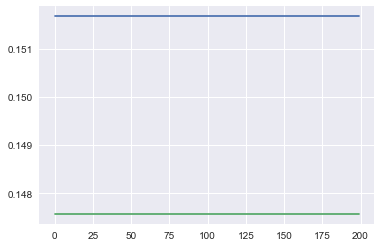

In [229]:
plt.plot([_ for _ in range(len(cmma))],cmma)
plt.plot([_ for _ in range(len(mmb))],mmb)

In [218]:
print(factor_mmb_cmma)

╒══════════════════════╤══════════════════╤══════════════════════════════════════════╕
│ money_market_bonus   │ collateral_mma   │   phi(money_market_bonus,collateral_mma) │
╞══════════════════════╪══════════════════╪══════════════════════════════════════════╡
│ money_market_bonus_0 │ collateral_mma_0 │                                   0.9049 │
├──────────────────────┼──────────────────┼──────────────────────────────────────────┤
│ money_market_bonus_0 │ collateral_mma_1 │                                   0.0799 │
├──────────────────────┼──────────────────┼──────────────────────────────────────────┤
│ money_market_bonus_1 │ collateral_mma_0 │                                   0.0751 │
├──────────────────────┼──────────────────┼──────────────────────────────────────────┤
│ money_market_bonus_1 │ collateral_mma_1 │                                   0.0953 │
╘══════════════════════╧══════════════════╧══════════════════════════════════════════╛


In [220]:
print(belief_nopriors['collateral_mma'].values[1])

0.151670177466


In [216]:
print(belief_nopriors['money_market_bonus'])

╒══════════════════════╤═══════════════════════════╕
│ money_market_bonus   │   phi(money_market_bonus) │
╞══════════════════════╪═══════════════════════════╡
│ money_market_bonus_0 │                    0.8524 │
├──────────────────────┼───────────────────────────┤
│ money_market_bonus_1 │                    0.1476 │
╘══════════════════════╧═══════════════════════════╛


In [390]:
#,
                     
#                      ('collateral_mma', 'checking_usd'), ('collateral_mma', 'cash_management'), 
#                      ('collateral_mma', 'fx_products'), ('collateral_mma', 'letters_of_credit'),
#                     ('collateral_mma', 'enterprise_sweep')
                     
#                     ])
esp_eligible_products = ['Money Market Bonus','Collateral MMA'
'Cash Management',
'FX Products',
'Letters of Credit',
'Enterprise Sweep',
'Checking USD']

def ESP_Markov_Model_Joint_Prob(esp_money_market_jointprob_probabilities,week_n_one_time= None,
                                      product_name = None,range_of_weeks=24,evidence_=None,single=True):
    """Returns the probability of having a given ESP product during a certain month.. 
    If no month_n is given, then will return distributions of each product per month for 24 months. 
    Otherwise, will only products for that month.
    If no product_name is given, then will return all products for a given month. Or, that particular product.
    
    WIth a single week_n_one_time set, return individual probabilities of 
    prob_checking, prob_cmma, prob_mmb, prob_cm, prob_fx, prob_loc, prob_es"""
    start_time = time.time()
    prob_mmb = []
    prob_cmma = []
    prob_cm = []
    prob_fx = []
    prob_loc = []
    prob_es = []
    prob_checking = []
    prob_given_month_no_priors_having_product = {}
    products =['money_market_bonus','collateral_mma','cash_management',
                                        'fx_products','letters_of_credit','enterprise_sweep','checking_usd']
    
    model = MarkovModel([('money_market_bonus', 'collateral_mma'), ('money_market_bonus', 'checking_usd'), 
                     ('money_market_bonus', 'cash_management'), ('money_market_bonus', 'fx_products'),
                    ('money_market_bonus', 'letters_of_credit'), ('money_market_bonus', 'enterprise_sweep'),
                    ('collateral_mma','cash_management'),('collateral_mma', 'fx_products'),('collateral_mma', 'letters_of_credit'),
                        ('collateral_mma', 'enterprise_sweep'),('collateral_mma', 'checking_usd'),('cash_management', 'fx_products'),
                        ('cash_management', 'fx_products'),('cash_management', 'letters_of_credit'),('cash_management', 'enterprise_sweep'),
                        ('cash_management', 'checking_usd'),('fx_products', 'letters_of_credit'),('fx_products', 'enterprise_sweep'),
                         ('fx_products', 'checking_usd'),('letters_of_credit', 'enterprise_sweep'),('letters_of_credit', 'checking_usd'),
                         ('enterprise_sweep', 'checking_usd')])
    def markov_inference(dict_of_esp_jointprob):
        factor_mmb_cmma = Factor(variables=['money_market_bonus', 'collateral_mma'],
                             cardinality=[2, 2],
                             values=[dict_of_esp_jointprob['mmb0_cmma0'], dict_of_esp_jointprob['mmb0_cmma1'],
                                    dict_of_esp_jointprob['mmb1_cmma0'], dict_of_esp_jointprob['mmb1_cmma1']])
        factor_mmb_cm = Factor(variables=['money_market_bonus', 'cash_management'],
                            cardinality=[2, 2],
                            values=[dict_of_esp_jointprob['mmb0_cm0'], dict_of_esp_jointprob['mmb0_cm1'],
                                    dict_of_esp_jointprob['mmb1_cm0'], dict_of_esp_jointprob['mmb1_cm1']])
        factor_mmb_fx = Factor(variables=['money_market_bonus', 'fx_products'],
                             cardinality=[2, 2],
                             values=[dict_of_esp_jointprob['mmb0_fx0'], dict_of_esp_jointprob['mmb0_fx1'],
                                    dict_of_esp_jointprob['mmb1_fx0'], dict_of_esp_jointprob['mmb1_fx1']])
        factor_mmb_loc = Factor(variables=['money_market_bonus', 'letters_of_credit'],
                             cardinality=[2, 2],
                             values=[dict_of_esp_jointprob['mmb0_loc0'], dict_of_esp_jointprob['mmb0_loc1'],
                                    dict_of_esp_jointprob['mmb1_loc0'], dict_of_esp_jointprob['mmb1_loc1']])
        factor_mmb_es = Factor(variables=['money_market_bonus', 'enterprise_sweep'],
                             cardinality=[2, 2],
                             values=[dict_of_esp_jointprob['mmb0_es0'], dict_of_esp_jointprob['mmb0_es1'],
                                    dict_of_esp_jointprob['mmb1_es0'], dict_of_esp_jointprob['mmb1_es1']])  
        factor_mmb_checking = Factor(variables=['money_market_bonus', 'checking_usd'],
                             cardinality=[2, 2],
                             values=[dict_of_esp_jointprob['mmb0_checking0'], dict_of_esp_jointprob['mmb0_checking1'],
                                    dict_of_esp_jointprob['mmb1_checking0'], dict_of_esp_jointprob['mmb1_checking1']])   
        # collateral mma

        factor_cmma_cm = Factor(variables=['collateral_mma','cash_management'],
                            cardinality=[2, 2],
                        values=[dict_of_esp_jointprob['cmma0_cm0'], dict_of_esp_jointprob['cmma0_cm1'],
                                dict_of_esp_jointprob['cmma1_cm0'], dict_of_esp_jointprob['cmma1_cm1']])

        factor_cmma_fx = Factor(variables=['collateral_mma', 'fx_products'],
                            cardinality=[2, 2],
                            values=[dict_of_esp_jointprob['cmma0_fx0'], dict_of_esp_jointprob['cmma0_fx1'],
                                    dict_of_esp_jointprob['cmma1_fx0'], dict_of_esp_jointprob['cmma1_fx1']])
        factor_cmma_loc = Factor(variables=['collateral_mma', 'letters_of_credit'],
                             cardinality=[2, 2],
                             values=[dict_of_esp_jointprob['cmma0_loc0'], dict_of_esp_jointprob['cmma0_loc1'],
                                    dict_of_esp_jointprob['cmma1_loc0'], dict_of_esp_jointprob['cmma1_loc1']])
        factor_cmma_es= Factor(variables=['collateral_mma', 'enterprise_sweep'],
                             cardinality=[2, 2],
                             values=[dict_of_esp_jointprob['cmma0_es0'], dict_of_esp_jointprob['cmma0_es1'],
                                    dict_of_esp_jointprob['cmma1_es0'], dict_of_esp_jointprob['cmma1_es1']])
        factor_cmma_checking = Factor(variables=['collateral_mma', 'checking_usd'],
                             cardinality=[2, 2],
                             values=[dict_of_esp_jointprob['cmma0_checking0'], dict_of_esp_jointprob['cmma0_checking1'],
                                    dict_of_esp_jointprob['cmma1_checking0'],dict_of_esp_jointprob['cmma1_checking1']])  
        # cash management
        factor_cm_fx = Factor(variables=['cash_management', 'fx_products'],
                            cardinality=[2, 2],
                            values=[dict_of_esp_jointprob['cm0_fx0'], dict_of_esp_jointprob['cm0_fx1'],
                                    dict_of_esp_jointprob['cm1_fx0'], dict_of_esp_jointprob['cm1_fx1']])
        factor_cm_loc = Factor(variables=['cash_management', 'letters_of_credit'],
                             cardinality=[2, 2],
                             values=[dict_of_esp_jointprob['cm0_loc0'], dict_of_esp_jointprob['cm0_loc1'],
                                    dict_of_esp_jointprob['cm1_loc0'], dict_of_esp_jointprob['cm1_loc1']])
        factor_cm_es= Factor(variables=['cash_management', 'enterprise_sweep'],
                             cardinality=[2, 2],
                             values=[dict_of_esp_jointprob['cm0_es0'], dict_of_esp_jointprob['cm0_es1'],
                                    dict_of_esp_jointprob['cm1_es0'], dict_of_esp_jointprob['cm1_es1']])
        factor_cm_checking = Factor(variables=['cash_management', 'checking_usd'],
                             cardinality=[2, 2],
                             values=[dict_of_esp_jointprob['cm0_checking0'], dict_of_esp_jointprob['cm0_checking1'],
                                    dict_of_esp_jointprob['cm1_checking0'], dict_of_esp_jointprob['cm1_checking1']])  

        # FX products
        factor_fx_loc = Factor(variables=['fx_products', 'letters_of_credit'],
                             cardinality=[2, 2],
                             values=[dict_of_esp_jointprob['fx0_loc0'], dict_of_esp_jointprob['fx0_loc1'],
                                    dict_of_esp_jointprob['fx1_loc0'], dict_of_esp_jointprob['fx1_loc1']])
        factor_fx_es= Factor(variables=['fx_products', 'enterprise_sweep'],
                             cardinality=[2, 2],
                             values=[dict_of_esp_jointprob['fx0_es0'], dict_of_esp_jointprob['fx0_es1'],
                                    dict_of_esp_jointprob['fx1_es0'], dict_of_esp_jointprob['fx1_es1']])
        factor_fx_checking = Factor(variables=['fx_products', 'checking_usd'],
                             cardinality=[2, 2],
                             values=[dict_of_esp_jointprob['fx0_checking0'], dict_of_esp_jointprob['fx0_checking1'],
                                    dict_of_esp_jointprob['fx1_checking0'], dict_of_esp_jointprob['fx1_checking1']])  

        # letters of credit

        factor_loc_es= Factor(variables=['letters_of_credit', 'enterprise_sweep'],
                             cardinality=[2, 2],
                             values=[dict_of_esp_jointprob['loc0_es0'], dict_of_esp_jointprob['loc0_es1'],
                                    dict_of_esp_jointprob['loc1_es0'], dict_of_esp_jointprob['loc1_es1']])
        factor_loc_checking = Factor(variables=['letters_of_credit', 'checking_usd'],
                         cardinality=[2, 2],
                         values=[dict_of_esp_jointprob['loc0_checking0'], dict_of_esp_jointprob['loc0_checking1'],
                                dict_of_esp_jointprob['loc1_checking0'], dict_of_esp_jointprob['loc1_checking1']])  
        #enterprise sweep

        factor_es_checking = Factor(variables=['enterprise_sweep', 'checking_usd'],
                             cardinality=[2, 2],
                             values=[dict_of_esp_jointprob['es0_checking0'], dict_of_esp_jointprob['es0_checking1'],
                                    dict_of_esp_jointprob['es1_checking0'], dict_of_esp_jointprob['es1_checking1']])  



        #model.add_factors( factor_cmma_cm , factor_cmma_fx, factor_cmma_loc,  factor_mmb_cmma, factor_cmma_es,factor_cmma_checking)#,
        model.add_factors(factor_mmb_cmma, factor_mmb_cm, factor_mmb_fx, factor_mmb_loc,factor_mmb_es ,factor_mmb_checking)#,
             #factor_cm_fx,   factor_cm_loc,    factor_cm_es,  factor_cm_checking )#, factor_fx_loc)#,
             #     factor_fx_es ,  factor_fx_checking,   factor_loc_es, factor_loc_checking , factor_es_checking )#,

        #print(model.markov_blanket('money_market_bonus'))
        belief_propagation = BeliefPropagation(model)
        #var_elimination = VariableElimination(model)
        
        all_products = ['money_market_bonus','collateral_mma', 'cash_management','enterprise_sweep',
                                    'fx_products','letters_of_credit','checking_usd']
        
        try:
            evidence_vars = evidence_.keys()
            belief_inference_products = []
            ### products to preform inference over
            for product in all_products:
                if product not in evidence_vars:
                    belief_inference_products.append(product)
        except: ### we don't have any evidence
            belief_inference_products = all_products
        
        

        
        

        belief_nopriors = belief_propagation.query(variables=belief_inference_products,evidence=evidence_)
        #belief_propagation.calibrate()


        # belief_nopriors = belief_propagation.query(variables=['money_market_bonus','collateral_mma',
         #                                                     'cash_management','enterprise_sweep',
          #                          'fx_products','letters_of_credit','checking_usd'],
        #                                                   evidence=evidence_)


        #            belief_propagation.calibrate()

        # append the probabilities over time
        #return belief_nopriors
        try:
            prob_mmb.append(belief_nopriors ['money_market_bonus'].values[1]) # one is having the product
        except:
            pass
        try:
            prob_cmma.append(belief_nopriors['collateral_mma'].values[1])
        except:## don't have this product
            pass
        try:
            prob_cm.append(belief_nopriors['cash_management'].values[1])
        except:
            pass
        try:
            prob_checking.append(belief_nopriors['checking_usd'].values[1])
        except:
            pass
        try:
            prob_fx.append(belief_nopriors['fx_products'].values[1])
        except:
            pass
        try:
            prob_loc.append(belief_nopriors['letters_of_credit'].values[1])
        except:
            pass
        try:
            prob_es.append(belief_nopriors['enterprise_sweep'].values[1])
        except:
            pass



    if single==False:
        for week_n_loop in range(range_of_weeks):
            dict_of_esp_jointprob = esp_money_market_jointprob_probabilities(week_n_loop)
            markov_inference(dict_of_esp_jointprob)
    else:
        dict_of_esp_jointprob = esp_money_market_jointprob_probabilities(week_n_one_time)
        markov_inference(dict_of_esp_jointprob)
        # the order of the factor model is a0_b0, a0_b1, ,a1_b0, a1_b1
        #http://conference.scipy.org/proceedings/scipy2015/pdfs/ankur_ankan.pdf
        #mmb

    return prob_checking, prob_cmma, prob_mmb, prob_cm, prob_fx, prob_loc, prob_es
    #print(np.nan_to_num(np.array(prob_cmma)))
    end_time = time.time()
    print('{} weeks took {} seconds'.format(range_of_weeks,end_time-start_time))
#     plt.figure(figsize=(15,8))
#     plt.plot([_ for _ in range( len(prob_mmb))], np.nan_to_num(np.array(prob_mmb)),label='mmb')
#     plt.plot([_ for _ in range( len(prob_cmma))], np.nan_to_num(np.array(prob_cmma)),label='cmma')
#     plt.plot([_ for _ in range( len(prob_fx))], np.nan_to_num(np.array(prob_fx)),label='fx')
#     plt.plot([_ for _ in range( len(prob_loc))], np.nan_to_num(np.array(prob_loc)),label='loc')
#     plt.plot([_ for _ in range( len(prob_cm))], np.nan_to_num(np.array(prob_cm)),label='cm')
#     plt.plot([_ for _ in range( len(prob_es))], np.nan_to_num(np.array(prob_es)),label='es')
#     #plt.plot([_ for _ in range( range_of_weeks)], np.nan_to_num(np.array(prob_checking)),label='checking', color='green')
#     plt.legend()
    
        


In [413]:
prob_checking, prob_cmma, prob_mmb, prob_cm, prob_fx, prob_loc, prob_es = \
    ESP_Markov_Model_Joint_Prob(ESP_Joint_Product_Probabilities,single=True,week_n_one_time=10,
                                evidence_={'checking_usd':0})

[] checking
[0.011628619511787333]  cmma
[-3.9268634753704687e-06] prob_mmb
[0.0051705394784614719] prob_cm
[0.037623856655736559] prob_fx
[0.22242033069426034] prob_loc
[0.14070132957881856] prob_es


In [401]:
probs = [ESP_Markov_Model_Joint_Prob(ESP_Joint_Product_Probabilities,single=True,week_n_one_time=i) for i in range(0,250)]

[0.22037397837417363] checking
[-0.030991754833002275]  cmma
[-5.5307195289327348e-06] prob_mmb
[0.00052942828174299447] prob_cm
[0.012400664498101078] prob_fx
[0.18855286942920346] prob_loc
[0.038892898820516324] prob_es
[0.23038100005557768] checking
[-0.026453101338143058]  cmma
[-6.9698940517303547e-06] prob_mmb
[0.0009622814159577131] prob_cm
[0.015430114679041465] prob_fx
[0.19204457648830123] prob_loc
[0.050507402643396281] prob_es
[0.24020194425050082] checking
[-0.021979084582173944]  cmma
[-8.4154105640278485e-06] prob_mmb
[0.0014017562272538653] prob_cm
[0.018338298485043522] prob_fx
[0.19551214308739168] prob_loc
[0.061763551298619823] prob_es
[0.2498326905576834] checking
[-0.017568506586241525]  cmma
[-9.8061801573161374e-06] prob_mmb
[0.0018479421468215376] prob_cm
[0.021128589798561966] prob_fx
[0.19895568076646181] prob_loc
[0.072677809797066326] prob_es
[0.25926920227978367] checking
[-0.013220197819672801]  cmma
[-1.1079377100740882e-05] prob_mmb
[0.00230093032046395

In [384]:
probs[0]

([0.22037397837417363],
 [-0.030991754833002275],
 [-5.5307195289327348e-06],
 [0.00052942828174299447],
 [0.012400664498101078],
 [0.18855286942920346],
 [0.038892898820516324])

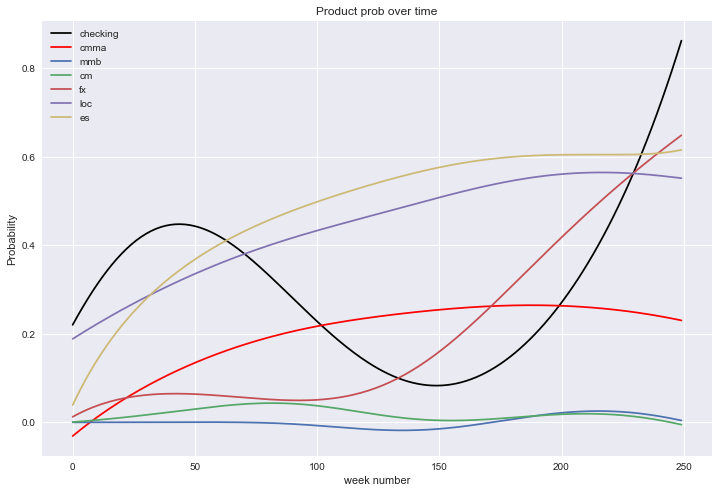

In [410]:

plt.figure(figsize=(12,8))
plt.plot([probs[i][0] for i in range(len(probs))],label='checking',color='black')
plt.plot([probs[i][1] for i in range(len(probs))],label='cmma',color='red')
plt.plot([probs[i][2] for i in range(len(probs))],label='mmb')
plt.plot([probs[i][3] for i in range(len(probs))],label='cm')
plt.plot([probs[i][4] for i in range(len(probs))],label='fx')
plt.plot([probs[i][5] for i in range(len(probs))],label='loc')
plt.plot([probs[i][6] for i in range(len(probs))],label='es')
plt.legend()
plt.title('Product prob over time')
plt.xlabel('week number')
plt.ylabel('Probability')